# TensorFlow Datasets

TFDS provides a collection of ready-to-use datasets for use with TensorFlow, Jax, and other Machine Learning frameworks.

It handles downloading and preparing the data deterministically and constructing a `tf.data.Dataset` (or `np.array`).

Note: Do not confuse [TFDS](https://tensorflow.google.cn/datasets) (this library) with `tf.data` (TensorFlow API to build efficient data pipelines). TFDS is a high level wrapper around `tf.data`. If you're not familiar with this API, we encourage you to read [the official tf.data guide](https://tensorflow.google.cn/guide/data) first.


Copyright 2018 The TensorFlow Datasets Authors, Licensed under the Apache License, Version 2.0

<table class="tfo-notebook-buttons" align="left">
  <td>     <a target="_blank" href="https://tensorflow.google.cn/datasets/overview"><img src="https://tensorflow.google.cn/images/tf_logo_32px.png"> 在 TensorFlow.org 上查看</a>   </td>
  <td>     <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/zh-cn/datasets/overview.ipynb"><img src="https://tensorflow.google.cn/images/colab_logo_32px.png">在 Google Colab 中运行</a>
</td>
  <td>     <a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/zh-cn/datasets/overview.ipynb"><img src="https://tensorflow.google.cn/images/GitHub-Mark-32px.png">在 Github 上查看源代码</a>   </td>
  <td><a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/zh-cn/datasets/overview.ipynb"><img src="https://tensorflow.google.cn/images/download_logo_32px.png">下载笔记本</a></td>
</table>

## 安装

TFDS 存在于两个软件包中：

- `pip install tensorflow-datasets`：稳定版，数月发行一次。
- `pip install tfds-nightly`：每天发行，包含最近版本的数据集。

此 colab 使用 `tfds-nightly`：


In [1]:
!pip install -q tfds-nightly tensorflow matplotlib

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

import tensorflow_datasets as tfds

## 查找可用的数据集

所有数据集构建器都是 `tfds.core.DatasetBuilder` 的子类。要获取可用构建器的列表，请使用 `tfds.list_builders()` 或查看我们的[目录](https://tensorflow.google.cn/datasets/catalog/overview)。

In [3]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cardiotox',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19',
 'covid19sum',
 'crema_d',
 'criteo',
 'cs_restaurants',
 'cura

## 加载数据集

### tfds.load

加载数据集最简单的方法是 `tfds.load`。它将执行以下操作：

1. 下载数据并将其存储为 [`tfrecord`](https://tensorflow.google.cn/tutorials/load_data/tfrecord) 文件。
2. 加载 `tfrecord` 并创建 `tf.data.Dataset`。


In [4]:
ds = tfds.load('mnist', split='train', shuffle_files=True)
assert isinstance(ds, tf.data.Dataset)
print(ds)

<PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>


一些常见的参数：

- `split=`：要读取的拆分（例如 `'train'`、`['train', 'test']`、`'train[80%:]'`…）。请参阅我们的[拆分 API 指南](https://tensorflow.google.cn/datasets/splits)。
- `shuffle_files=`：控制是否打乱每个周期间的文件顺序（TFDS 以多个较小的文件存储大数据集）
- `data_dir=`：数据集存储的位置（默认为 `~/tensorflow_datasets/`）
- `with_info=True`：返回包含数据集元数据的 `tfds.core.DatasetInfo`
- `download=False`：停用下载


### tfds.builder

`tfds.load` 是 `tfds.core.DatasetBuilder` 的瘦封装容器。您可以使用 `tfds.core.DatasetBuilder` API 获得相同的输出：

In [5]:
builder = tfds.builder('mnist')
# 1. Create the tfrecord files (no-op if already exists)
builder.download_and_prepare()
# 2. Load the `tf.data.Dataset`
ds = builder.as_dataset(split='train', shuffle_files=True)
print(ds)

<PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>


### `tfds build` CLI

如果您希望生成一个特定的数据集，可以使用 [`tfds` 命令行](https://tensorflow.google.cn/datasets/cli)。例如：

```sh
tfds build mnist
```

请参阅[文档](https://tensorflow.google.cn/datasets/cli)查看可用标志。

## 迭代数据集

### 作为字典

默认情况下，`tf.data.Dataset` 对象包含 `tf.Tensor` 的 `dict`：

In [6]:
ds = tfds.load('mnist', split='train')
ds = ds.take(1)  # Only take a single example

for example in ds:  # example is `{'image': tf.Tensor, 'label': tf.Tensor}`
  print(list(example.keys()))
  image = example["image"]
  label = example["label"]
  print(image.shape, label)

['image', 'label']
(28, 28, 1) tf.Tensor(4, shape=(), dtype=int64)


2022-06-04 01:42:18.953468: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


要找出 `dict` 键名和结构，请查看[我们目录](https://tensorflow.google.cn/datasets/catalog/overview#all_datasets)中的数据集文档。例如：[mnist 文档](https://tensorflow.google.cn/datasets/catalog/mnist)。

### 作为元组（`as_supervised=True`）

使用 `as_supervised=True`，您可以获取 `(features, label)` 元组作为替代的监督数据集。

In [7]:
ds = tfds.load('mnist', split='train', as_supervised=True)
ds = ds.take(1)

for image, label in ds:  # example is (image, label)
  print(image.shape, label)

(28, 28, 1) tf.Tensor(4, shape=(), dtype=int64)


2022-06-04 01:42:19.814894: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


### 作为 numpy（`tfds.as_numpy`）

使用 `tfds.as_numpy` 进行以下转换：

- `tf.Tensor` -&gt; `np.array`
- `tf.data.Dataset` -&gt; `Iterator[Tree[np.array]]`（`Tree` 可能是任意嵌套的 `Dict`、`Tuple`）


In [8]:
ds = tfds.load('mnist', split='train', as_supervised=True)
ds = ds.take(1)

for image, label in tfds.as_numpy(ds):
  print(type(image), type(label), label)

<class 'numpy.ndarray'> <class 'numpy.int64'> 4


2022-06-04 01:42:20.644584: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


### 作为 batched tf.Tensor（`batch_size=-1`）

使用 `batch_size=-1`，您可以在单个批次中加载完整的数据集。

这可与 `as_supervised=True` 和 `tfds.as_numpy` 结合使用以获取 `(np.array, np.array)` 形式的数据：


In [9]:
image, label = tfds.as_numpy(tfds.load(
    'mnist',
    split='test',
    batch_size=-1,
    as_supervised=True,
))

print(type(image), image.shape)

<class 'numpy.ndarray'> (10000, 28, 28, 1)


请注意，您的数据集可以放入内存，并且所有样本都具有相同的形状。

## 对您的数据集进行基准分析

对数据集进行基准分析是对任何可迭代对象（例如 `tf.data.Dataset`、`tfds.as_numpy`…）的简单 `tfds.benchmark` 调用。


In [10]:
ds = tfds.load('mnist', split='train')
ds = ds.batch(32).prefetch(1)

tfds.benchmark(ds, batch_size=32)
tfds.benchmark(ds, batch_size=32)  # Second epoch much faster due to auto-caching


************ Summary ************

Examples/sec (First included) 25550.77 ex/sec (total: 60000 ex, 2.35 sec)
Examples/sec (First only) 118.76 ex/sec (total: 32 ex, 0.27 sec)
Examples/sec (First excluded) 28847.20 ex/sec (total: 59968 ex, 2.08 sec)



************ Summary ************

Examples/sec (First included) 222130.99 ex/sec (total: 60000 ex, 0.27 sec)
Examples/sec (First only) 1808.32 ex/sec (total: 32 ex, 0.02 sec)
Examples/sec (First excluded) 237577.05 ex/sec (total: 59968 ex, 0.25 sec)


,duration,num_examples,avg
first+lasts,0.270111,60000,222130.988089
first,0.017696,32,1808.323987
lasts,0.252415,59968,237577.052240


- 不要忘记使用 `batch_size=` kwarg 对每个批次大小的结果进行归一化。
- 总之，第一个预热批次与其他预热批次分开以捕获 `tf.data.Dataset` 额外的设置时间（例如缓冲区初始化…）。
- 请注意，由于 [TFDS 自动缓存功能](https://tensorflow.google.cn/datasets/performances#auto-caching)，第二次迭代的速度要快得多。
- `tfds.benchmark` 会返回 `tfds.core.BenchmarkResult` ，可以检查它以进行进一步分析。

### 构建端到端流水线

要想深入一点，您可以查看：

- 我们的[端到端 Keras 示例](https://tensorflow.google.cn/datasets/keras_example)来了解完整的训练流水线（包括批处理、打乱顺序…）。
- 有助于提高流水线速度的[性能指南](https://tensorflow.google.cn/datasets/performances)（提示：使用 `tfds.benchmark(ds)` 对数据集进行基准分析）。


## 呈现

### tfds.as_dataframe

使用 `tfds.as_dataframe`，可以将 `tf.data.Dataset` 对象转换为 [`pandas.DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) 以在 [Colab](https://colab.research.google.com) 上呈现。

- 添加 `tfds.core.DatasetInfo` 作为 `tfds.as_dataframe` 的第二个参数以呈现图像、音频、文本、视频…
- 使用 `ds.take(x)` 仅显示前 `x` 个样本。`pandas.DataFrame` 将在内存中加载完整数据集，并且显示开销可能非常高。

In [11]:
ds, info = tfds.load('mnist', split='train', with_info=True)

tfds.as_dataframe(ds.take(4), info)

2022-06-04 01:42:25.724077: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


,image,label
0,,4
1,,1
2,,0
3,,7


### tfds.show_examples

`tfds.show_examples` 返回 `matplotlib.figure.Figure`（现在只支持图像数据集）：

2022-06-04 01:42:26.911049: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


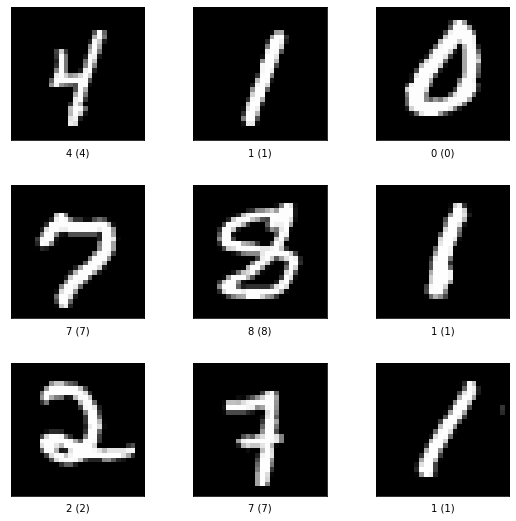

In [12]:
ds, info = tfds.load('mnist', split='train', with_info=True)

fig = tfds.show_examples(ds, info)

## 访问数据集元数据

所有构建器都包括一个包含数据集元数据的 `tfds.core.DatasetInfo` 对象。

可以通过以下方式访问：

- `tfds.load` API：


In [13]:
ds, info = tfds.load('mnist', with_info=True)

- `tfds.core.DatasetBuilder` API：

In [14]:
builder = tfds.builder('mnist')
info = builder.info

数据集信息包含有关数据集的附加信息（版本、引用、首页、描述…）。

In [15]:
print(info)

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='gs://tensorflow-datasets/datasets/mnist/3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)

### 特征元数据（标签名称、图像形状…）

访问 `tfds.features.FeatureDict`：

In [16]:
info.features

FeaturesDict({
    'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
})

类、标签名的数量：

In [17]:
print(info.features["label"].num_classes)
print(info.features["label"].names)
print(info.features["label"].int2str(7))  # Human readable version (8 -> 'cat')
print(info.features["label"].str2int('7'))

10
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
7
7


形状、数据类型：

In [18]:
print(info.features.shape)
print(info.features.dtype)
print(info.features['image'].shape)
print(info.features['image'].dtype)

{'image': (28, 28, 1), 'label': ()}
{'image': tf.uint8, 'label': tf.int64}
(28, 28, 1)
<dtype: 'uint8'>


### 拆分元数据（例如拆分名称、样本数量…）

访问 `tfds.core.SplitDict`：

In [19]:
print(info.splits)

{'test': <SplitInfo num_examples=10000, num_shards=1>, 'train': <SplitInfo num_examples=60000, num_shards=1>}


可用拆分：

In [20]:
print(list(info.splits.keys()))

['test', 'train']


获取有关个别拆分的信息：

In [21]:
print(info.splits['train'].num_examples)
print(info.splits['train'].filenames)
print(info.splits['train'].num_shards)

60000
['mnist-train.tfrecord-00000-of-00001']
1


它也适用于 subsplit API：

In [22]:
print(info.splits['train[15%:75%]'].num_examples)
print(info.splits['train[15%:75%]'].file_instructions)

36000
[FileInstruction(filename='gs://tensorflow-datasets/datasets/mnist/3.0.1/mnist-train.tfrecord-00000-of-00001', skip=9000, take=36000, num_examples=36000)]


## 问题排查

### 手动下载（如果下载失败）

如果由于某种原因下载失败（例如离线…），那么您始终可以自己手动下载数据并将其放置在 `manual_dir` 中（默认为 `~/tensorflow_datasets/download/manual/`）。

要找到下载网址，请查看：

- 对于新数据集（作为文件夹实现）：[`tensorflow_datasets/`](https://github.com/tensorflow/datasets/tree/master/tensorflow_datasets/)`<type>/<dataset_name>/checksums.tsv`。例如：[`tensorflow_datasets/text/bool_q/checksums.tsv`](https://github.com/tensorflow/datasets/blob/master/tensorflow_datasets/text/bool_q/checksums.tsv)。

    您可以在[我们的目录](https://tensorflow.google.cn/datasets/catalog/overview)中找到数据集的源位置。

- 对于旧数据集：[`tensorflow_datasets/url_checksums/<dataset_name>.txt`](https://github.com/tensorflow/datasets/tree/master/tensorflow_datasets/url_checksums)

### 修正 `NonMatchingChecksumError`

TFDS 通过验证下载网址的校验和来确保确定性。如果引发 `NonMatchingChecksumError`，则可能表示：

- 网站可能宕机（如 `503 status code`）。请检查网址。
- 对于 Google 云端硬盘网址，请稍后再试。当很多人访问同一网址时云端硬盘有时拒绝下载。请参阅[错误](https://github.com/tensorflow/datasets/issues/1482)
- 原始数据集文件可能已更新。在这种情况下，应当更新 TFDS 数据集构建器。请打开一个新的 Github 议题或拉取请求：
    - 使用 `tfds build --register_checksums` 注册新的校验和
    - 逐步更新数据集生成代码。
    - 更新数据集 `VERSION`
    - 更新数据集 `RELEASE_NOTES`：是什么导致校验和发生变化？一些样本发生了改变吗？
    - 确保数据集仍能够构建。
    - 向我们发送拉取请求

注：您也可以检查 `~/tensorflow_datasets/download/` 中的下载文件。


## 引用

如果您在论文中使用 `tensorflow-datasets`，除了特定于所用数据集（可以在[数据集目录](https://tensorflow.google.cn/datasets/catalog/overview)中找到）的任何引用之外，请包含以下引用。

```
@misc{TFDS,
  title = { {TensorFlow Datasets}, A collection of ready-to-use datasets},
  howpublished = {\url{https://tensorflow.google.cn/datasets}},
}
```